In [2]:
import time
import os
import torch
import pytorch_mask_rcnn as pmr


# ------------------ adjustable parameters ---------------------

use_cuda = True # choose to use GPU or not
visualize = True # choose to visualize evaluation results or not
dataset = 'voc' # coco or voc
data_dir = '/input/data/voc2012/VOCdevkit/VOC2012' # dataset directory
val_num_batches = 3 # number of samples during test

# ------------------ auto  ------------------------------------

num_classes = 21 if dataset == 'voc' else 91 # 91 for coco, 21 for voc
ckpt_path = '/input/ckpt/checkpoint_{}.pth'.format(dataset) # path where to save the checkpoint.pth
official_ckpt_dir = '/input/ckpt/official'

# -------------------------------------------------------------

In [9]:
import time
import os
import torch
import pytorch_mask_rcnn as pmr


# ------------------ adjustable parameters ---------------------

use_cuda = True # choose to use GPU or not
visualize = True # choose to visualize evaluation results or not
dataset = 'voc' # coco or voc
data_dir = '/PyTorch/data/voc2012/VOCdevkit/VOC2012' # dataset directory
val_num_batches = 3 # number of samples during test

# ------------------ auto  ------------------------------------

num_classes = 21 if dataset == 'voc' else 91 # 91 for coco, 21 for voc
ckpt_path = '../ckpt/checkpoint_{}_v1-21-30725.pth'.format(dataset) # path where to save the checkpoint.pth
official_ckpt_dir = None

# -------------------------------------------------------------

In [10]:
device = torch.device('cuda' if torch.cuda.is_available() and use_cuda else 'cpu')
pmr.gpu_info(show=True)
print('\ndevice: {}'.format(device))

dataset_test = pmr.datasets(dataset, data_dir, 'val', True)
classes = dataset_test.classes

data_loader_test = torch.utils.data.DataLoader(dataset_test, collate_fn=pmr.collate_wrapper)
if val_num_batches < 0:
    visualize = False # Usually, you should not show all images of the dataset.
    val_num_batches = (len(dataset_test) + batch_size - 1) // batch_size
        
model = pmr.maskrcnn_resnet50(False, num_classes, ckpt_dir=official_ckpt_dir).to(device)

if os.path.exists(ckpt_path):
    checkpoint = torch.load(ckpt_path, map_location=device)
    if 'model' in checkpoint:
        model.load_state_dict(checkpoint['model'])
    else:
        model.load_state_dict(checkpoint)
    
    del checkpoint
    torch.cuda.empty_cache()

cuda: True
available GPU(s): 1
0: {'name': 'GeForce GTX 960', 'capability': (5, 2), 'total_momory': 4.0, 'sm_count': 8}

device: cuda


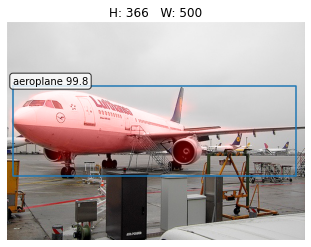

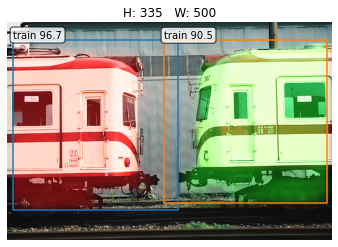

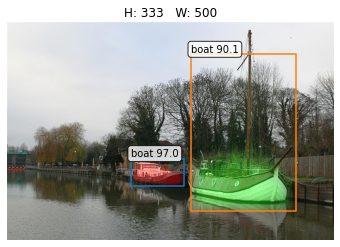


total time: 1.62 s


In [11]:
since = time.time()

# ------------------ test ---------------------

model.eval()
for i, (images, targets) in enumerate(data_loader_test):
    if i >= val_num_batches:
        break
    images = [img.to(device) for img in images]
    targets = [{k: v.to(device) for k, v in tgt.items()} for tgt in targets]
        
    with torch.no_grad():
        results = model(images)

    if visualize:
        for image, result in zip(images, results):
            pmr.show(image, result, classes)

# ------------------ test ---------------------

print('\ntotal time: {:.2f} s'.format(time.time() - since))

In [12]:
output = pmr.evaluate(model, data_loader_test, device, val_num_batches)
print(output)

IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.408
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.667
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.417
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.250
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.433
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.200
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.417
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.417
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.250
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.433
IoU metric: segm
 Ave